In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# -- Uncomment following 4 lines if running in Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# # %cd 'drive/My Drive/Colab Notebooks/diabetes.csv'
# %cd 'drive/My Drive/Colab Notebooks/'
# !ls
# df_train = pd.read_csv('train.csv',encoding= 'unicode_escape')
# df_test = pd.read_csv('test.csv',encoding= 'unicode_escape')

# df_train.head()

In [3]:
data = pd.read_csv('diabetes.csv')

In [4]:
data.shape

(768, 9)

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#check if any null value is present
data.isnull().values.any()

False

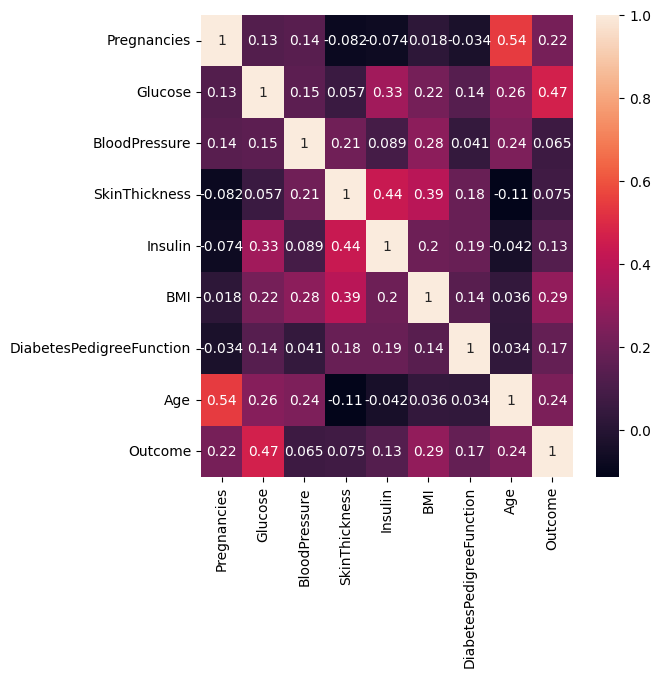

In [7]:
#to find out correlation in features
import seaborn as sns
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(6,6))
#plot heatmap
g=sns.heatmap(data[top_corr_features].corr(),annot=True)

In [8]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
#split the dataset
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [10]:
#Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# **check how many other missing (zero) values**

In [13]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose'] == 0])))
print("number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure'] == 0])))
print("number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin'] == 0])))
print("number of rows missing BMI: {0}".format(len(data.loc[data['BMI'] == 0])))
print("number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction'] == 0])))
print("number of rows missing Age: {0}".format(len(data.loc[data['Age'] == 0])))
print("number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing Glucose: 5
number of rows missing Glucose: 5
number of rows missing BloodPressure: 35
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0
number of rows missing SkinThickness: 227


In [14]:
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy="mean", verbose=0)

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:382: FutureWarning: The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.
  warnings.warn(


In [15]:
print(X_train)

[[-0.84488505 -0.81042491 -0.47073225 ... -1.02710391 -0.63989158
  -0.95646168]
 [ 0.3429808  -0.49745345  0.14964075 ...  0.62284628 -0.94492356
  -0.44593516]
 [-1.14185152  0.44146091 -0.05715025 ...  1.30821021 -0.32277912
  -0.78628618]
 ...
 [ 1.82781311 -0.62264204  0.87340925 ...  1.72704372  2.00573238
   0.40494237]
 [-1.14185152  0.62924378 -3.57259724 ...  1.32090213 -0.8059981
  -0.36084741]
 [-1.14185152  0.12848945  1.39038675 ... -1.20479085 -0.63385134
  -1.04154944]]


In [16]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
# Initialize models
svm_model = SVC(kernel='poly',probability=True)
naive_bayes_model = GaussianNB()
knn_model = KNeighborsClassifier()
logreg_model = LogisticRegression()

In [18]:
# Train models
svm_model.fit(X_train, y_train)

SVC(kernel='poly', probability=True)

In [19]:
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [20]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [22]:
#Model Evaluation
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score

In [25]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label=1)
    return accuracy, report,precision,recall

In [26]:
svm_accuracy, svm_report, svm_p,svm_r= evaluate_model(svm_model, X_test, y_test)
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision : ",svm_p)

SVM Accuracy: 0.7532467532467533
SVM Precision :  0.7169811320754716


In [27]:
naive_bayes_accuracy, naive_bayes_report,nvp,nvr = evaluate_model(naive_bayes_model, X_test, y_test)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)
print("Naive Bayes Precision:",nvp)

Naive Bayes Accuracy: 0.7445887445887446
Naive Bayes Precision: 0.6235294117647059


In [28]:
knn_accuracy, knn_report ,knn_p,knn_r= evaluate_model(knn_model, X_test, y_test)
print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_p)

KNN Accuracy: 0.6926406926406926
KNN Precision: 0.5616438356164384


In [29]:
logreg_accuracy, logreg_report,log_reg_p,lgr= evaluate_model(logreg_model, X_test, y_test)
print("logistic regression Accuracy:", logreg_accuracy)
print("logistic regression precision:", log_reg_p)

logistic regression Accuracy: 0.7359307359307359
logistic regression precision: 0.6172839506172839


In [30]:
accuracy=[svm_accuracy,naive_bayes_accuracy,knn_accuracy,logreg_accuracy]
print(accuracy)

[0.7532467532467533, 0.7445887445887446, 0.6926406926406926, 0.7359307359307359]


In [31]:
precision=[svm_p,nvp,knn_p,log_reg_p]
print(precision)

[0.7169811320754716, 0.6235294117647059, 0.5616438356164384, 0.6172839506172839]


In [32]:
recall=[svm_r,nvr,knn_r,lgr]
print(recall)

[0.475, 0.6625, 0.5125, 0.625]


In [ ]:
best_model = max(svm_accuracy, naive_bayes_accuracy, knn_accuracy, logreg_accuracy)

if best_model == svm_accuracy:
    selected_model = svm_model
elif best_model == naive_bayes_accuracy:
    selected_model = naive_bayes_model
elif best_model == knn_accuracy:
    selected_model = knn_model
else:
    selected_model = logreg_model

In [ ]:
print("Selected Model:", selected_model)

In [ ]:
print("Classification Report:\n", classification_report(y_test, selected_model.predict(X_test)))

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier=xgboost.XGBClassifier()


In [ ]:
#ensemble learning
from sklearn.ensemble import VotingClassifier

In [ ]:
ensemble = VotingClassifier(
    estimators=[
        ('svm', svm_model),
        ('knn', knn_model),
        ('nb', naive_bayes_model),
        ('lr', logreg_model)
    ],
    voting='soft'  # Use soft voting for weighted averaging of probabilities
)

In [ ]:
# Train the ensemble on the training data
ensemble.fit(X_train, y_train)


In [ ]:
# Make predictions on the test data
y_pred = ensemble.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Accuracy: {accuracy:.2f}')

In [ ]:
import pickle

In [ ]:
filename="trainedmodel3.sav"
pickle.dump(selected_model,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model=pickle.load(open('trainedmodel3.sav','rb'))

In [ ]:
#predicting the user input data by using loaded model
input_data = (1,69,1,2,2,1,1,2,1,2,2,2,2,2,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not having lung cancer')
else:
  print('The person is having lung cancer')